In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

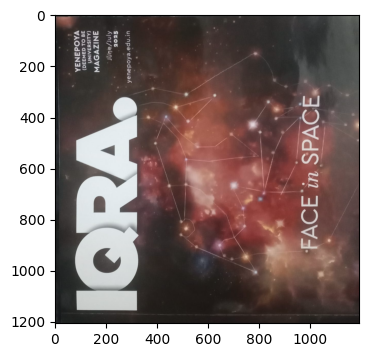

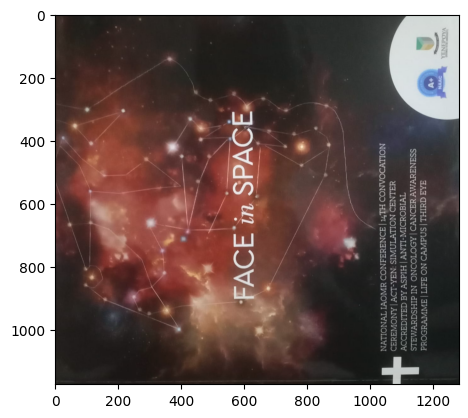

In [40]:
img1 = cv2.imread('../data/bookleft.jpeg')
img2 = cv2.imread('../data/bookright.jpeg')
plt.figure(figsize=(5,4))
plt.imshow(img1)
plt.show()
plt.imshow(img2)
plt.show()

In [33]:
sift = cv2.SIFT_create()

# Detect keypoints and descriptors
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Use BFMatcher to find matches
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(des1, des2)

# Sort matches by distance
matches = sorted(matches, key=lambda x: x.distance)
matches

[< cv2.DMatch 0x702240618c10>,
 < cv2.DMatch 0x702240618230>,
 < cv2.DMatch 0x702240618db0>,
 < cv2.DMatch 0x7022406188b0>,
 < cv2.DMatch 0x70224047b7b0>,
 < cv2.DMatch 0x70224047ba90>,
 < cv2.DMatch 0x702240618490>,
 < cv2.DMatch 0x702240618dd0>,
 < cv2.DMatch 0x70224047b9d0>,
 < cv2.DMatch 0x7022406181d0>,
 < cv2.DMatch 0x7022406186d0>,
 < cv2.DMatch 0x702240618330>,
 < cv2.DMatch 0x7022406188d0>,
 < cv2.DMatch 0x702240618290>,
 < cv2.DMatch 0x702240478c30>,
 < cv2.DMatch 0x702240618e10>,
 < cv2.DMatch 0x702240618d90>,
 < cv2.DMatch 0x7022406184b0>,
 < cv2.DMatch 0x702240618df0>,
 < cv2.DMatch 0x702240553010>,
 < cv2.DMatch 0x7022406186b0>,
 < cv2.DMatch 0x702240618130>,
 < cv2.DMatch 0x702240618e50>,
 < cv2.DMatch 0x7022404789f0>,
 < cv2.DMatch 0x7022406182f0>,
 < cv2.DMatch 0x70224047ba30>,
 < cv2.DMatch 0x702240478c50>,
 < cv2.DMatch 0x7022406181f0>,
 < cv2.DMatch 0x7022406190f0>,
 < cv2.DMatch 0x702240618470>,
 < cv2.DMatch 0x702240618070>,
 < cv2.DMatch 0x702240479c30>,
 < cv2.D

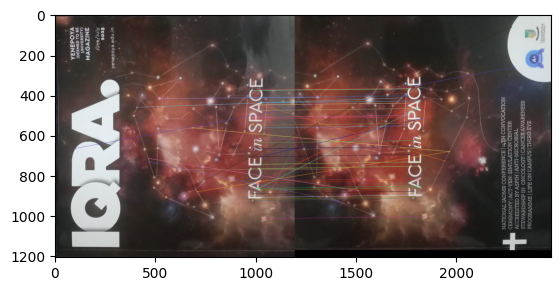

In [34]:
import matplotlib.pyplot as plt
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img_matches)

In [35]:
# Extract location of good matches
src_pts = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)

# Compute homography
H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
H

array([[ 9.57866444e-01, -1.79626765e-02,  4.15292314e+02],
       [-9.76336035e-03,  9.90317303e-01,  9.73745628e+00],
       [-3.82123170e-05,  3.18539155e-06,  1.00000000e+00]])

In [ ]:
# Get the dimensions of the images
h1, w1 = img1.shape[:2]
h2, w2 = img2.shape[:2]

# Corners of img2
pts_img2 = np.float32([[0,0], [0,h2], [w2,h2], [w2,0]]).reshape(-1,1,2)
# Transform them into img1 coordinate space
pts_img2_trans = cv2.perspectiveTransform(pts_img2, H)

# Corners of img1
pts_img1 = np.float32([[0,0], [0,h1], [w1,h1], [w1,0]]).reshape(-1,1,2)

# All corners together
all_pts = np.concatenate((pts_img1, pts_img2_trans), axis=0)

# Find the bounding box of the stitched panorama
[xmin, ymin] = np.int32(all_pts.min(axis=0).ravel() - 0.5)
[xmax, ymax] = np.int32(all_pts.max(axis=0).ravel() + 0.5)

# Translation needed if xmin or ymin are negative
translation = [-xmin, -ymin]

# Translation matrix
T = np.array([[1, 0, translation[0]],
              [0, 1, translation[1]],
              [0, 0, 1]]) 

# Warp img2 into this bigger canvas
result = cv2.warpPerspective(img2, T @ H, (xmax - xmin, ymax - ymin))

# Paste img1 into the canvas
result[translation[1]:h1+translation[1], translation[0]:w1+translation[0]] = img1



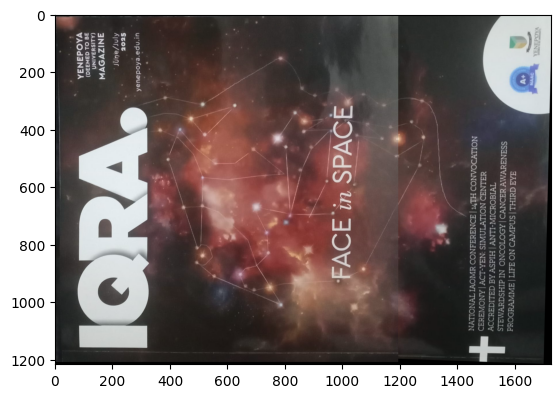

In [37]:
# Simple blending technique
# result = img2_warped
plt.imshow(result)